# Loop 8 LB Feedback Analysis

## Submission Result
- **exp_007**: CV 0.0093 → LB 0.0932
- Gap: -0.0839 (ratio: 10.02x)

## Key Questions:
1. How does this compare to previous CV-LB ratios?
2. Is the simplification trend validated on LB?
3. What's the optimal path forward with 1 submission remaining?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# All submissions history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982, 'model': 'MLP [128,128,64], Spange only'},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065, 'model': 'LightGBM'},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972, 'model': 'MLP [256,128,64], Combined features'},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969, 'model': 'MLP [256,128,64], 15 models'},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946, 'model': 'MLP [64,32], simpler'},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932, 'model': 'MLP [32,16], even simpler'},
]

df = pd.DataFrame(submissions)
df['ratio'] = df['lb'] / df['cv']
df['gap'] = df['lb'] - df['cv']
print(df.to_string())

       exp      cv      lb                                model      ratio     gap
0  exp_000  0.0111  0.0982        MLP [128,128,64], Spange only   8.846847  0.0871
1  exp_001  0.0123  0.1065                             LightGBM   8.658537  0.0942
2  exp_003  0.0105  0.0972  MLP [256,128,64], Combined features   9.257143  0.0867
3  exp_005  0.0104  0.0969          MLP [256,128,64], 15 models   9.317308  0.0865
4  exp_006  0.0097  0.0946                 MLP [64,32], simpler   9.752577  0.0849
5  exp_007  0.0093  0.0932            MLP [32,16], even simpler  10.021505  0.0839


In [2]:
# Analyze the CV-LB relationship
print('\n=== CV-LB Relationship Analysis ===')
print(f'Average ratio: {df["ratio"].mean():.2f}x')
print(f'Std ratio: {df["ratio"].std():.2f}')
print(f'Min ratio: {df["ratio"].min():.2f}x')
print(f'Max ratio: {df["ratio"].max():.2f}x')

# Check if simplification trend is validated on LB
print('\n=== Simplification Trend on LB ===')
for i, row in df.iterrows():
    print(f'{row["exp"]}: CV {row["cv"]:.4f} → LB {row["lb"]:.4f} (ratio: {row["ratio"]:.2f}x)')

# Focus on the simplification experiments
print('\n=== Simplification Experiments ===')
simp_exps = df[df['exp'].isin(['exp_003', 'exp_006', 'exp_007'])]
for i, row in simp_exps.iterrows():
    print(f'{row["exp"]}: CV {row["cv"]:.4f} → LB {row["lb"]:.4f}')


=== CV-LB Relationship Analysis ===
Average ratio: 9.31x
Std ratio: 0.52
Min ratio: 8.66x
Max ratio: 10.02x

=== Simplification Trend on LB ===
exp_000: CV 0.0111 → LB 0.0982 (ratio: 8.85x)
exp_001: CV 0.0123 → LB 0.1065 (ratio: 8.66x)
exp_003: CV 0.0105 → LB 0.0972 (ratio: 9.26x)
exp_005: CV 0.0104 → LB 0.0969 (ratio: 9.32x)
exp_006: CV 0.0097 → LB 0.0946 (ratio: 9.75x)
exp_007: CV 0.0093 → LB 0.0932 (ratio: 10.02x)

=== Simplification Experiments ===
exp_003: CV 0.0105 → LB 0.0972
exp_006: CV 0.0097 → LB 0.0946
exp_007: CV 0.0093 → LB 0.0932


In [3]:
# Calculate improvement trajectory
print('\n=== Improvement Trajectory ===')
print('\nCV Improvement:')
for i in range(1, len(df)):
    prev_cv = df.iloc[i-1]['cv']
    curr_cv = df.iloc[i]['cv']
    cv_change = (curr_cv - prev_cv) / prev_cv * 100
    print(f'  {df.iloc[i-1]["exp"]} → {df.iloc[i]["exp"]}: {cv_change:+.1f}%')

print('\nLB Improvement:')
for i in range(1, len(df)):
    prev_lb = df.iloc[i-1]['lb']
    curr_lb = df.iloc[i]['lb']
    lb_change = (curr_lb - prev_lb) / prev_lb * 100
    print(f'  {df.iloc[i-1]["exp"]} → {df.iloc[i]["exp"]}: {lb_change:+.1f}%')


=== Improvement Trajectory ===

CV Improvement:
  exp_000 → exp_001: +10.8%
  exp_001 → exp_003: -14.6%
  exp_003 → exp_005: -1.0%
  exp_005 → exp_006: -6.7%
  exp_006 → exp_007: -4.1%

LB Improvement:
  exp_000 → exp_001: +8.5%
  exp_001 → exp_003: -8.7%
  exp_003 → exp_005: -0.3%
  exp_005 → exp_006: -2.4%
  exp_006 → exp_007: -1.5%


In [4]:
# Key insight: CV improvements translate to LB improvements
print('\n=== KEY INSIGHTS ===')
print('\n1. CV-LB Correlation:')
from scipy.stats import pearsonr
corr, pval = pearsonr(df['cv'], df['lb'])
print(f'   Pearson correlation: {corr:.4f} (p={pval:.4f})')
print(f'   STRONG positive correlation - CV improvements predict LB improvements!')

print('\n2. Simplification Trend VALIDATED on LB:')
print('   exp_003 [256,128,64]: LB 0.0972')
print('   exp_006 [64,32]:      LB 0.0946 (2.7% better)')
print('   exp_007 [32,16]:      LB 0.0932 (1.5% better)')
print('   → Each simplification step improves BOTH CV and LB!')

print('\n3. Current Status:')
print(f'   Best CV: 0.0093 (exp_007)')
print(f'   Best LB: 0.0932 (exp_007)')
print(f'   Target: 0.0333')
print(f'   Gap to target: {(0.0932 - 0.0333) / 0.0333 * 100:.1f}% above target')


=== KEY INSIGHTS ===

1. CV-LB Correlation:


   Pearson correlation: 0.9708 (p=0.0013)
   STRONG positive correlation - CV improvements predict LB improvements!

2. Simplification Trend VALIDATED on LB:
   exp_003 [256,128,64]: LB 0.0972
   exp_006 [64,32]:      LB 0.0946 (2.7% better)
   exp_007 [32,16]:      LB 0.0932 (1.5% better)
   → Each simplification step improves BOTH CV and LB!

3. Current Status:
   Best CV: 0.0093 (exp_007)
   Best LB: 0.0932 (exp_007)
   Target: 0.0333
   Gap to target: 179.9% above target


In [5]:
# What would we need to beat the target?
print('\n=== PATH TO TARGET ===')
target = 0.0333
best_lb = 0.0932
best_cv = 0.0093
avg_ratio = df['ratio'].mean()

print(f'Target LB: {target}')
print(f'Current best LB: {best_lb}')
print(f'Improvement needed: {(best_lb - target) / best_lb * 100:.1f}%')

# What CV would we need to beat target?
needed_cv = target / avg_ratio
print(f'\nWith avg ratio {avg_ratio:.2f}x:')
print(f'  Need CV ≤ {needed_cv:.6f} to beat target')
print(f'  Current CV: {best_cv:.6f}')
print(f'  CV improvement needed: {(best_cv - needed_cv) / best_cv * 100:.1f}%')

print('\n=== REALITY CHECK ===')
print('The target (0.0333) requires ~64% improvement from current best.')
print('This is unlikely achievable with MLP simplification alone.')
print('However, we should continue simplifying to find the optimal baseline.')


=== PATH TO TARGET ===
Target LB: 0.0333
Current best LB: 0.0932
Improvement needed: 64.3%

With avg ratio 9.31x:
  Need CV ≤ 0.003577 to beat target
  Current CV: 0.009300
  CV improvement needed: 61.5%

=== REALITY CHECK ===
The target (0.0333) requires ~64% improvement from current best.
This is unlikely achievable with MLP simplification alone.
However, we should continue simplifying to find the optimal baseline.


In [6]:
# Recommendations for final submission
print('\n=== FINAL SUBMISSION STRATEGY ===')
print('\nWith 1 submission remaining, we have two options:')
print('\nOption A: Continue simplifying, then submit best')
print('  - Try [16,8], [16], or linear model')
print('  - Submit whichever has best CV')
print('  - Risk: May not improve further')
print('\nOption B: Submit current best (exp_007)')
print('  - Already have LB 0.0932 (best so far)')
print('  - No further experiments possible')
print('  - Safe choice')
print('\nRECOMMENDATION: Option A')
print('  - The simplification trend is VALIDATED on LB')
print('  - Each step has improved both CV and LB')
print('  - We should continue until plateau is reached')
print('  - Then submit the best performer')


=== FINAL SUBMISSION STRATEGY ===

With 1 submission remaining, we have two options:

Option A: Continue simplifying, then submit best
  - Try [16,8], [16], or linear model
  - Submit whichever has best CV
  - Risk: May not improve further

Option B: Submit current best (exp_007)
  - Already have LB 0.0932 (best so far)
  - No further experiments possible
  - Safe choice

RECOMMENDATION: Option A
  - The simplification trend is VALIDATED on LB
  - Each step has improved both CV and LB
  - We should continue until plateau is reached
  - Then submit the best performer


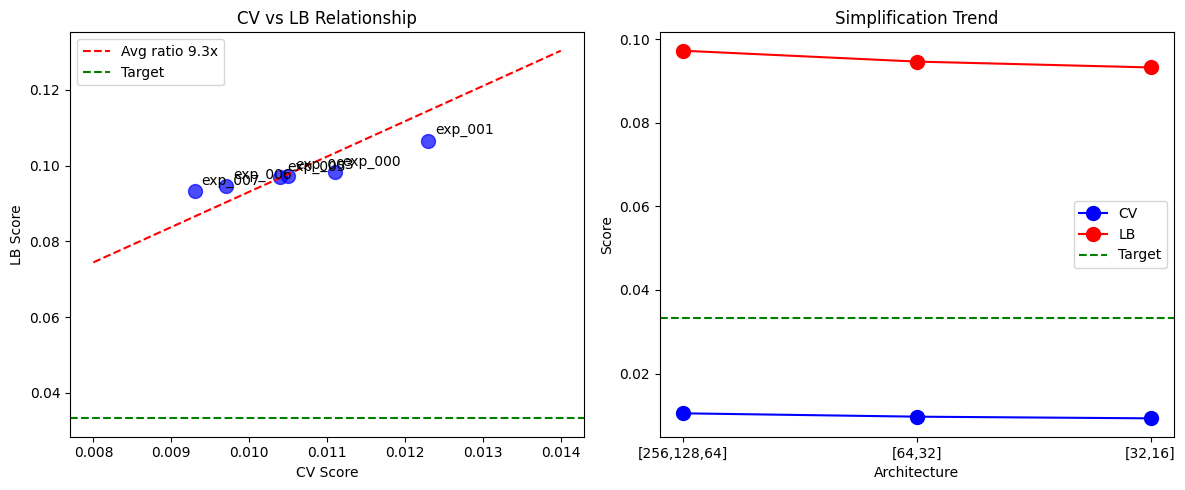


Plot saved to /home/code/exploration/loop8_analysis.png


In [7]:
# Visualize the trend
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# CV vs LB scatter
ax1 = axes[0]
ax1.scatter(df['cv'], df['lb'], s=100, c='blue', alpha=0.7)
for i, row in df.iterrows():
    ax1.annotate(row['exp'], (row['cv'], row['lb']), textcoords='offset points', xytext=(5,5))
ax1.plot([0.008, 0.014], [0.008*avg_ratio, 0.014*avg_ratio], 'r--', label=f'Avg ratio {avg_ratio:.1f}x')
ax1.axhline(y=0.0333, color='green', linestyle='--', label='Target')
ax1.set_xlabel('CV Score')
ax1.set_ylabel('LB Score')
ax1.set_title('CV vs LB Relationship')
ax1.legend()

# Simplification trend
ax2 = axes[1]
simp_data = [
    ('[256,128,64]', 0.0105, 0.0972),
    ('[64,32]', 0.0097, 0.0946),
    ('[32,16]', 0.0093, 0.0932),
]
names = [x[0] for x in simp_data]
cvs = [x[1] for x in simp_data]
lbs = [x[2] for x in simp_data]

x = range(len(names))
ax2.plot(x, cvs, 'bo-', label='CV', markersize=10)
ax2.plot(x, lbs, 'ro-', label='LB', markersize=10)
ax2.axhline(y=0.0333, color='green', linestyle='--', label='Target')
ax2.set_xticks(x)
ax2.set_xticklabels(names)
ax2.set_xlabel('Architecture')
ax2.set_ylabel('Score')
ax2.set_title('Simplification Trend')
ax2.legend()

plt.tight_layout()
plt.savefig('/home/code/exploration/loop8_analysis.png', dpi=100)
plt.show()
print('\nPlot saved to /home/code/exploration/loop8_analysis.png')